In [113]:
import numpy as np
import pandas as pd

# Jupyter Notebookの出力を小数点以下3桁に抑える
%precision 3
# Dataframe の出力を小数点以下3桁に抑える
pd.set_option('precision', 3)

In [114]:
df = pd.read_csv('./data/ch2_scores_em.csv', index_col='生徒番号')
df.head()

,英語,数学
生徒番号,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [115]:
scores = np.array(df['英語'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [116]:
scores_df = pd.DataFrame({'点数' :scores}, index=pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], name='生徒'))
scores_df

,点数
生徒,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


## データの中心の指標

### 平均値（mean）

In [117]:
sum(scores) / len(scores)

55.0

In [118]:
np.mean(scores)

55.0

In [119]:
scores_df.mean()

点数    55.0
dtype: float64

### 中央値

In [120]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [121]:
n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
else:
    median = sorted_scores[(n+1)//2 - 1]
median

56.5

In [122]:
np.median(scores)

56.5

In [123]:
scores_df.median()

点数    56.5
dtype: float64

### 最頻値

In [124]:
pd.Series([1, 1, 1, 2, 3]).mode()

0    1
dtype: int64

In [125]:
pd.Series(list(range(1, 6))).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

## データのばらつきの指標

In [126]:
print(scores)
print(np.mean(scores))

[42 69 56 41 57 48 65 49 65 58]
55.0


In [127]:

mean = np.mean(scores)
deviation = scores - mean
# 偏差
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [128]:
another_scores = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
# 別の配列の偏差
print(another_deviation)
# 平均
print(another_mean)

[-5.  5.  3. -1. -4.  1.  2. -2. -3.  4.]
55.0


In [129]:
# 偏差の平均(0になる)
np.mean(deviation)

0.0

In [130]:
# 別の偏差の平均（やはり0）
np.mean(another_deviation)

0.0

In [131]:
# 偏差 （点数 - 点数の平均）
summary_df = scores_df.copy()
summary_df['偏差'] = deviation
summary_df

,点数,偏差
生徒,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [132]:
# 各列の平均
summary_df.mean()

点数    55.0
偏差     0.0
dtype: float64

### 分散

In [133]:
np.mean(deviation ** 2)

86.0

In [134]:
np.var(scores)

86.0

In [135]:
# Pandasの分散は不偏分散
scores_df.var()

点数    95.556
dtype: float64

In [136]:
scores_df.var(ddof=0)

点数    86.0
dtype: float64

In [137]:
summary_df['偏差2乗'] = deviation ** 2
summary_df

,点数,偏差,偏差2乗
生徒,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [138]:
summary_df.mean()

点数      55.0
偏差       0.0
偏差2乗    86.0
dtype: float64

### 標準偏差

In [139]:
round(np.sqrt(np.var(scores)), 3)

9.274

In [140]:
round(np.std(scores, ddof=0), 3)

9.274

## 範囲と四分位範囲

### 範囲

In [141]:
np.max(scores)

69

In [142]:
np.min(scores)

41

In [143]:
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [144]:
# 範囲（最大値 - 最小値）
np.max(scores) - np.min(scores)

28

### 四分位範囲

In [145]:
scores_Q1 = np.percentile(scores, 25)
scores_Q2 = np.percentile(scores, 50) # 中央値に相当
scores_Q3 = np.percentile(scores, 75)
print("Q2 :", scores_Q2)
print("IQR : ", scores_Q3 - scores_Q1)

Q2 : 56.5
IQR :  15.0


## データの指標のまとめ

In [146]:
pd.Series(scores).describe()

count    10.000
mean     55.000
std       9.775
min      41.000
25%      48.250
50%      56.500
75%      63.250
max      69.000
dtype: float64

## データの正規化

### 標準化

In [147]:
# データから平均を引き、標準偏差で割る操作を標準化（standardization）と呼ぶ
# 標準化されたデータを基準化変量（standardized data）やZスコア（z-score）と呼ぶ
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [148]:
# Z値の平均は0, 標準偏差は1となる
round(np.mean(z), 3), round(np.std(z, ddof=0), 3)

(-0.0, 1.0)

### 偏差値

`偏差値` は平均が50、標準偏差が10となるように正規化された値のこと

In [149]:
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)  
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [150]:
scores_df['偏差値'] = z
scores_df

,点数,偏差値
生徒,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


In [151]:
scores_df.mean()

点数     55.0
偏差値    50.0
dtype: float64

## 1次元データの視覚化

### 度数分布表

In [152]:
english_scores = np.array(df['英語'])
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

In [153]:
# 度数
freq, _ = np.histogram(english_scores, bins=10, range=(0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [154]:
english_scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58, 70, 47, 51, 64, 62, 70, 71,
       68, 73, 37, 65, 65, 61, 52, 57, 57, 75, 61, 47, 54, 66, 54, 54, 42,
       37, 79, 56, 62, 62, 55, 63, 57, 57, 67, 55, 45, 66, 55, 64, 66])

In [155]:
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]
freq_dist_df = pd.DataFrame({'度数':freq}, index=pd.Index(freq_class, name='階級'))
freq_dist_df

,度数
階級,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [156]:
# 階級値
class_value = [(i + (i + 10)) // 2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [157]:
# 相対度数
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [158]:
# 累積度数
cum_freq = np.cumsum(freq)
cum_freq

array([ 0,  0,  0,  2, 10, 26, 44, 50, 50, 50])

In [159]:
# 累積相対度数
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [160]:
freq_dist_df['階級値'] = class_value
freq_dist_df['相対度数'] = rel_freq
freq_dist_df['累積相対度数'] = cum_rel_freq
freq_dist_df = freq_dist_df[['階級値', '度数', '相対度数', '累積相対度数']]
freq_dist_df

,階級値,度数,相対度数,累積相対度数
階級,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


### 最頻値
度数分布表を使った最頻値は、`度数が最大となる階級の階級値。`  
上記表であれば、度数18の60~70階級の階級値`65`

In [161]:
freq_dist_df.loc[freq_dist_df['度数'].idxmax(), '階級値']

65

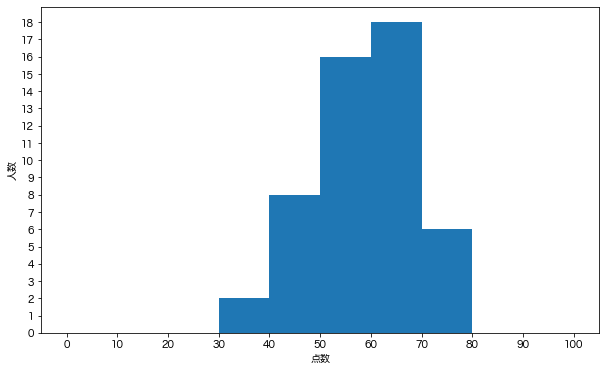

In [169]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
freq, _, _ = ax.hist(english_scores, bins=10, range=(0, 100))
ax.set_xlabel('点数')
ax.set_ylabel('人数')
ax.set_xticks(np.linspace(0, 100, 10+1))
ax.set_yticks(np.arange(0, freq.max() + 1))
plt.show()

In [167]:
import matplotlib
print(matplotlib.matplotlib_fname()) #設定ファイルを表示（matplotlibrcは後で作ります）
print(matplotlib.rcParams['font.family']) #現在使用しているフォントを表示
print(matplotlib.get_configdir()) #設定ディレクトリを表示
print(matplotlib.get_cachedir()) #キャッシュディレクトリを表示

/Users/t-yoko/.anyenv/envs/pyenv/versions/3.7.6/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc
['IPAexGothic']
/Users/t-yoko/.matplotlib
/Users/t-yoko/.matplotlib


階級値25


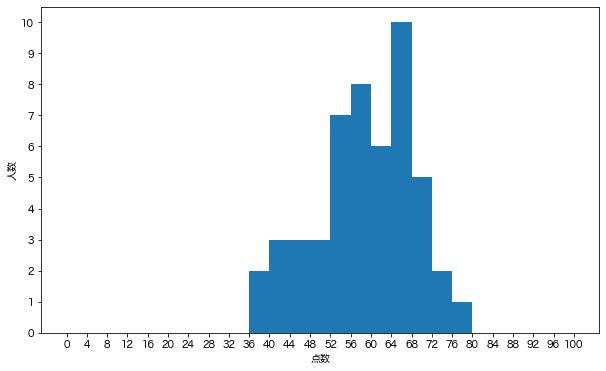

In [172]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
freq, _, _ = ax.hist(english_scores, bins=25, range=(0, 100))
ax.set_xlabel('点数')
ax.set_ylabel('人数')
ax.set_xticks(np.linspace(0, 100, 25+1))
ax.set_yticks(np.arange(0, freq.max() + 1))
print("階級値25")
plt.show()

### 相対度数のヒストグラムを累積相対度数の折れ線グラフと一緒に描画

ヒストグラムと累積相対度数


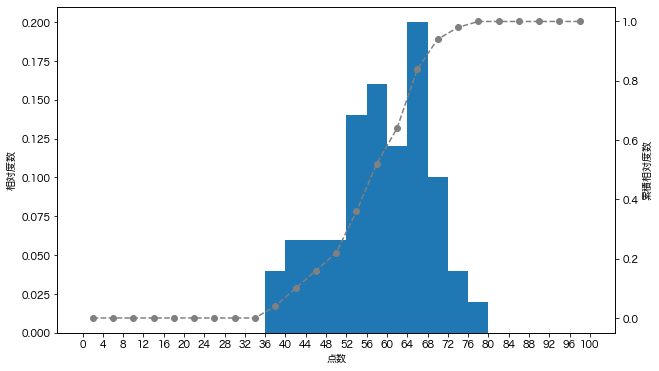

In [179]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _, = ax1.hist(english_scores, bins=25, range=(0, 100), weights=weights)
cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]

ax2.plot(class_value, cum_rel_freq, ls='--', marker='o', color='gray')
ax2.grid(visible=False)

ax1.set_xlabel('点数')
ax1.set_ylabel('相対度数')
ax2.set_ylabel('累積相対度数')
ax1.set_xticks(np.linspace(0, 100, 25+1))

print("ヒストグラムと累積相対度数")
plt.show()

## 箱ひげ図

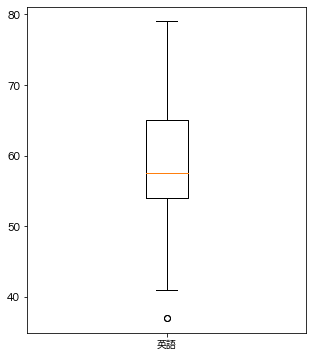

In [180]:
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['英語'])

plt.show()

In [182]:
np.sort(english_scores)

array([37, 37, 41, 42, 42, 45, 47, 47, 48, 49, 51, 52, 54, 54, 54, 55, 55,
       55, 56, 56, 57, 57, 57, 57, 57, 58, 61, 61, 62, 62, 62, 63, 64, 64,
       65, 65, 65, 65, 66, 66, 66, 67, 68, 69, 70, 70, 71, 73, 75, 79])